In [ ]:
#get the data from
!wget https://www.dropbox.com/s/dtw18saps0231yn/BrainTumorData.zip?d1=0


In [ ]:
!unzip /content/BrainTumorData.zip?d1=0

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy  as np
import matplotlib.pyplot as plt
import os
import math
import shutil

In [5]:
import glob

In [6]:
#count the number of images in the respective classes
#0---- brain tumour
#1---- healthy
ROOT_DIR = r'/content/BrainTumorData/Brain Tumor Data Set'
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR , dir)))



In [7]:
 number_of_images

{'Brain Tumor': 2513, 'Healthey': 2087}

In [8]:
#split the data 
# 70 % for train data 
# 15 % for validation
# 15 % for testing


In [9]:
if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./train/"+dir)

    for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)) , 
                                size = (math.floor(70/100 * number_of_images[dir])),
                                replace=False
                                ):
      O = os.path.join(ROOT_DIR,dir,img)#path
      D = os.path.join('./train',dir)
      shutil.copy(O,D)
      os.remove(O)
  else:
    print("The folder exists")
    

The folder exists


In [10]:
def dataFolder(path , split):
  if not os.path.exists("./"+path):
    os.mkdir("./"+path)
    
    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+path+"/"+dir)
      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)) , 
                                size = (math.floor(split* number_of_images[dir])),
                                replace=False
                                ):
        O = os.path.join(ROOT_DIR,dir,img)#path
        D = os.path.join('./'+path,dir)
        shutil.copy(O,D)
        os.remove(O)
    print("THE DATA IS TRANSFFERED")
  else:
      print("The folder exists")
    


In [11]:
dataFolder('train',0.7)

The folder exists


In [12]:
dataFolder('val',0.15)

THE DATA IS TRANSFFERED


In [13]:
dataFolder('test',0.15)

THE DATA IS TRANSFFERED


In [ ]:
#Model Building

In [14]:
from keras.layers import Conv2D , MaxPool2D , Dropout , Flatten , Dense , BatchNormalization , GlobalAveragePooling2D

from keras.models import Sequential

from keras.preprocessing.image import ImageDataGenerator
import keras

In [15]:
# CNN MODEL

model = Sequential()

model.add(Conv2D(filters=16 , kernel_size= (3,3) , activation='relu' , input_shape = (224,224,3)  ))

model.add(Conv2D(filters=36 , kernel_size= (3,3) , activation='relu' ))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64 , kernel_size= (3,3) , activation='relu' ))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128 , kernel_size= (3,3) , activation='relu' ))

model.add(MaxPool2D(pool_size=(2,2)))


model.add(Dropout(rate = 0.25))

model.add(Flatten())

model.add(Dense(units= 64 , activation='relu'))

model.add(Dropout(rate = 0.25))

model.add(Dense(units= 1 , activation='sigmoid'))






In [16]:
model.compile(optimizer='adam' , loss= keras.losses.binary_crossentropy , metrics=['accuracy'])

In [ ]:
#preparing our data using data generator


In [17]:
def preprocessingImages(path):
  """
  input:Path
  output: preprocess images
  """
  image_data = ImageDataGenerator(zoom_range=0.2 , shear_range=0.2 , rescale=1/255 , horizontal_flip=True)
  image = image_data.flow_from_directory(directory = path , target_size = (224 , 224) , batch_size = 32 ,class_mode = 'binary' )

  return image







In [18]:
train_path = "/content/train"
train_data = preprocessingImages(train_path)



Found 3219 images belonging to 2 classes.


In [19]:
def preprocessingImages2(path):
  """
  input:Path
  output: preprocess images
  """
  image_data = ImageDataGenerator( rescale=1/255 , )
  image = image_data.flow_from_directory(directory = path , target_size = (224 , 224) , batch_size = 32 ,class_mode = 'binary' )

  return image






In [20]:
test_path = r'/content/test'
test_data = preprocessingImages2(test_path)

Found 689 images belonging to 2 classes.


In [21]:
val_path = r'/content/val'
val_data = preprocessingImages2(val_path)

Found 689 images belonging to 2 classes.


In [22]:
from keras.callbacks import  ModelCheckpoint ,  EarlyStopping


In [27]:

es = EarlyStopping(monitor = 'val_accuracy' , min_delta= 0.01 , patience=6 , verbose=1 , mode='auto')



mc = ModelCheckpoint(monitor = 'val_accuracy' , min_delta= 0.01,filepath="./bestmodel.h5" , verbose=1 , save_best_only=True ,mode='auto')


cd = [es , mc]

In [28]:
hs = model.fit_generator(generator= train_data , steps_per_epoch=8,
                         epochs = 8,
                         verbose = 1,
                         validation_data = val_data,
                         validation_steps = 16,
                         callbacks = cd
                         )

Epoch 1/8
8/8 [==============================] - 5s 669ms/step - loss: 0.5671 - accuracy: 0.7243 - val_loss: 0.5025 - val_accuracy: 0.7949

Epoch 00001: val_accuracy improved from -inf to 0.79492, saving model to ./bestmodel.h5
Epoch 2/8
8/8 [==============================] - 5s 674ms/step - loss: 0.5558 - accuracy: 0.7227 - val_loss: 0.4514 - val_accuracy: 0.7988

Epoch 00002: val_accuracy improved from 0.79492 to 0.79883, saving model to ./bestmodel.h5
Epoch 3/8
8/8 [==============================] - 5s 669ms/step - loss: 0.5089 - accuracy: 0.7617 - val_loss: 0.4836 - val_accuracy: 0.7754

Epoch 00003: val_accuracy did not improve from 0.79883
Epoch 4/8
8/8 [==============================] - 5s 700ms/step - loss: 0.5014 - accuracy: 0.7773 - val_loss: 0.4860 - val_accuracy: 0.7988

Epoch 00004: val_accuracy did not improve from 0.79883
Epoch 5/8
8/8 [==============================] - 5s 671ms/step - loss: 0.5182 - accuracy: 0.7778 - val_loss: 0.4537 - val_accuracy: 0.8066

Epoch 00005

In [25]:
#model graphic interpretation

h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

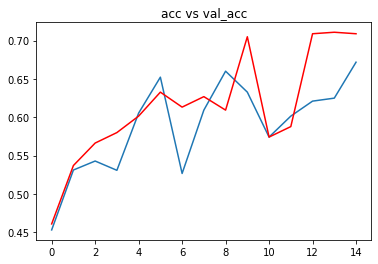

In [29]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = 'red')

plt.title("acc vs val_acc")
plt.show()

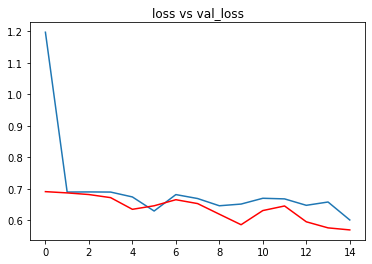

In [30]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = 'red')

plt.title("loss vs val_loss")
plt.show()

In [31]:
#model accuracy
from keras.models import load_model

model = load_model('/content/bestmodel.h5')


In [32]:
acc = model.evaluate_generator(test_data)[1]

print(acc)

0.8185776472091675


In [33]:
from keras_preprocessing.image import load_img , img_to_array

In [44]:
path = '/content/BrainTumorData/Brain Tumor Data Set/Healthey/Not Cancer  (1944).jpg'
image = load_img(path , target_size=(224,224))

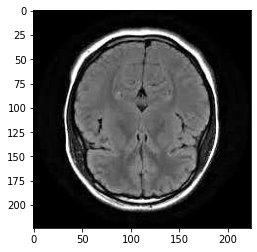

In [49]:
input_array = img_to_array(image)/255
plt.imshow(input_array)
plt.show()

In [46]:
input_array = np.expand_dims(input_array , axis = 0)

pred = model.predict_classes(input_array)[0][0]

In [48]:
if pred == 0:
    print("Brain Tumour")
else:
  print("Healthy")


Healthy
